# California Houses Price Prediction

## 1- Importing needed libraries

In [11]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2- Reading the Dataset 

In [12]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [13]:
X = df.drop('target', axis=1)
y = df['target']

## 3- Splitting the Dataset 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4- Building the Neural Network 

In [23]:
model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(3, activation='relu'),                                   
    Dense(1)                                                       
])

#### Compile the model

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### Train the model

In [25]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)

## 5- Evaluate the model

In [26]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'MSE: {test_loss:.4f}')
print(f'MAE: {test_mae:.4f}')

213/213 [==============================] - 0s 2ms/step - loss: 0.3501 - mae: 0.4136
MSE: 0.3501
MAE: 0.4136


## 6- Visualizing the model

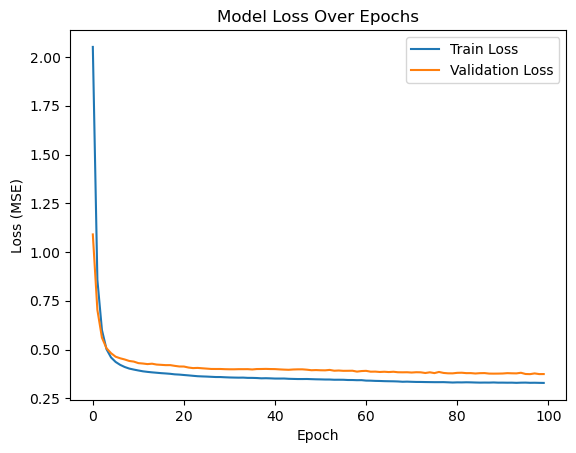

In [27]:
train_losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()